<p><a name="sections"></a></p>


# Sections

- <a href="#DS">Data Loading</a><br>
- <a href="#DC">Data Cleaning</a><br>
- <a href="#DM">Data Manipulation</a><br>


In [430]:
import numpy as np
import pandas as pd
import re
import quandl
import datetime

<p><a name="DL"></a></p>
### Data Loading

- Load the Data from the scrapy output GlassDoor2.csv

In [716]:
ReviewsRaw = pd.read_csv('GlassDoor2.csv')

- Load the Data from the scrapy Overview output - this contains the metadata from top 100 list

In [ ]:
CompOverview = pd.read_csv('GlassDoorOverview.csv')

In [406]:
CompOverview.head()

,CompanyHQ,Industry,Name,Revenue,Size,Type
0,"Menlo Park, CA",Internet,Facebook,$5 to $10 billion (USD) per year,10000+ employees,Company - Public (FB)
1,"Boston, MA",Consulting,Bain & Company,$2 to $5 billion (USD) per year,5001 to 10000 employees,Company - Private
2,"Boston, MA",Consulting,Boston Consulting Group,$2 to $5 billion (USD) per year,Unknown,Company - Private
3,"Irvine, CA",Fast-Food & Quick-Service Restaurants,In-N-Out Burger,$100 to $500 million (USD) per year,10000+ employees,Company - Private
4,"Mountain View, CA",Internet,Google,$10+ billion (USD) per year,10000+ employees,Company - Public (GOOG)


In [667]:
ReviewsRaw.Name.head()[1]

' SAP Concur '

### Stock Data
- Retrieve stock data for all publicly traded companies from list

#### Quandl
- Quandl - able to successfully get only 40 or so of the 49 companies. 7 missing, 2 have surprisingly short time series data.

In [24]:
quandl.ApiConfig.api_key = "QxQBHqhaqAhrtcGJVirJ"

In [77]:
Public = pd.DataFrame({"Public": CompOverview.Type.str.contains('public',case=False)})
Ticker = pd.DataFrame({"Ticker": list(map(lambda s: s[s.find("(")+1:s.find(")")],CompOverview.Type))})

Overview2 = pd.concat((CompOverview,Public,Ticker),axis=1)
Overview2.Ticker = Overview2.Ticker*Overview2.Public


In [427]:
OverviewPublic = Overview2[Overview2.Ticker!='']
OverviewPublic = OverviewPublic[OverviewPublic.index != 42] #drop Protiviti - not actually public/traded
OverviewPublic.index = range(0,len(OverviewPublic))
TickerList = OverviewPublic.Ticker

In [698]:
CompOverview

,CompanyHQ,Industry,Name,Revenue,Size,Type
0,"Menlo Park, CA",Internet,Facebook,$5 to $10 billion (USD) per year,10000+ employees,Company - Public (FB)
1,"Boston, MA",Consulting,Bain & Company,$2 to $5 billion (USD) per year,5001 to 10000 employees,Company - Private
2,"Boston, MA",Consulting,Boston Consulting Group,$2 to $5 billion (USD) per year,Unknown,Company - Private
3,"Irvine, CA",Fast-Food & Quick-Service Restaurants,In-N-Out Burger,$100 to $500 million (USD) per year,10000+ employees,Company - Private
4,"Mountain View, CA",Internet,Google,$10+ billion (USD) per year,10000+ employees,Company - Public (GOOG)
5,"Vancouver, BC (Canada)","Department, Clothing, & Shoe Stores",lululemon,$2 to $5 billion (USD) per year,1001 to 5000 employees,Company - Public (LULU)
6,"Cambridge, MA",Computer Hardware & Software,HubSpot,$100 to $500 million (USD) per year,1001 to 5000 employees,Company - Public (HUBS)
7,"Maryland Heights, MO",Computer Hardware & Software,World Wide Technology,$5 to $10 billion (USD) per year,1001 to 5000 employees,Company - Private
8,"Memphis, TN",NaN,St. Jude Children's Research Hospital,$100 to $500 million (USD) per year,1001 to 5000 employees,Nonprofit Organization
9,"Weston, FL",Enterprise Software & Network Solutions,Ultimate Software,$500 million to $1 billion (USD) per year,1001 to 5000 employees,Company - Public (ULTI)


In [704]:
OverviewPublic

,CompanyHQ,Industry,Name,Revenue,Size,Type,Public,Ticker
0,"Menlo Park, CA",Internet,Facebook,$5 to $10 billion (USD) per year,10000+ employees,Company - Public (FB),True,FB
1,"Mountain View, CA",Internet,Google,$10+ billion (USD) per year,10000+ employees,Company - Public (GOOG),True,GOOG
2,"Vancouver, BC (Canada)","Department, Clothing, & Shoe Stores",lululemon,$2 to $5 billion (USD) per year,1001 to 5000 employees,Company - Public (LULU),True,LULU
3,"Cambridge, MA",Computer Hardware & Software,HubSpot,$100 to $500 million (USD) per year,1001 to 5000 employees,Company - Public (HUBS),True,HUBS
4,"Weston, FL",Enterprise Software & Network Solutions,Ultimate Software,$500 million to $1 billion (USD) per year,1001 to 5000 employees,Company - Public (ULTI),True,ULTI
5,"Walldorf, Baden-Württemberg (Germany)",Computer Hardware & Software,SAP,$10+ billion (USD) per year,10000+ employees,Company - Public (SAP),True,SAP
6,"San Francisco, CA",Computer Hardware & Software,Salesforce,$5 to $10 billion (USD) per year,10000+ employees,Company - Public (CRM),True,CRM
7,"Atlanta, GA",Airlines,Delta Air Lines,$10+ billion (USD) per year,10000+ employees,Company - Public (DAL),True,DAL
8,"Dallas, TX",Airlines,Southwest Airlines,$10+ billion (USD) per year,10000+ employees,Company - Public (LUV),True,LUV
9,"Santa Clara, CA",Computer Hardware & Software,NVIDIA,$5 to $10 billion (USD) per year,10000+ employees,Company - Public (NVDA),True,NVDA


- <b>OverviewPublic</b> now contains the overview data for 49 companies of the original review list. 
- TickerList contains a list of the stock tickers for these companies only

#### Quandl API function

In [198]:
def quandl_stocks(symbol, start_date=(2010, 1, 1), end_date=None):
    query_list = ['WIKI' + '/' + symbol + '.' + str(k) for k in [1,11]]
 
    start_date = datetime.date(*start_date)
 
    if end_date:
        end_date = datetime.date(*end_date)
    else:
        end_date = datetime.date.today()
 
    return quandl.get(query_list, 
            returns='pandas', 
            start_date=start_date,
            end_date=end_date,
            collapse='daily',
            order='asc'
            )
if __name__ == '__main__':
    apple_data = quandl_stocks('AAPL')


- Return all available data for stocks in TickerList from Quandl

In [284]:
data = quandl_stocks('FB')
data.columns = ['Ticker', 'Adj. Close']
data.Ticker = 'FB'
for stocks in TickerList[1:]: # iterate through all the other tickers, append to df
    newdata = quandl_stocks(stocks)
    if len(newdata) < 500:
        print(stocks,len(newdata)) # print tickers with missing/unavail info
    newdata.columns = ['Ticker', 'Adj. Close']
    newdata.Ticker = stocks
    data = pd.concat([data,newdata],axis=0)

LULU 0
HUBS 0
SAP 0
RHHBY 0
CDW 0
ADDYY 0
RDSA 0


In [ ]:
#datasaved = data.copy()

- Get rid of TRV and HLT data from Quandl, will replace with Yahoo data below

In [398]:
testdata = data[data.Ticker!="HLT"]
testdata = testdata[testdata.Ticker!="TRV"]
testdata = testdata[testdata.Ticker!="MMM"]

#### YAHOO finance data for the rest
- missing contains list to retrieve from yahoo


In [399]:
missing = ['LULU','HUBS','SAP','RHHBY','CDW','ADDYY','RDSA','TRV','HLT','MMM'] #TRV, HLT - add more data, quandl limited. MMM data corrupted

- import CSVs and transform into same quandl formatting

In [400]:
missingdata = pd.read_csv('LULU.csv', index_col=0)
missingdata = missingdata[['Open','Adj Close']]
missingdata.columns = ['Ticker', 'Adj. Close']
missingdata.Ticker = "LULU"

for tickers in missing[1:]:
    newdata2 = pd.read_csv(tickers+'.csv', index_col=0)
    if len(newdata2) < 100:
        print(tickers,len(newdata2))
    newdata2 = newdata2[['Open','Adj Close']]
    newdata2.columns = ['Ticker', 'Adj. Close']
    newdata2.Ticker = tickers
    missingdata = pd.concat([missingdata,newdata2],axis=0)
    

In [343]:
#missingdatacopy = missingdata.copy()

In [401]:
missingdata.index = pd.to_datetime(missingdata.index)

In [883]:
SPYprices = pd.read_csv('SPY.csv', index_col=0)
SPYprices = SPYprices[['Adj Close']]
SPYprices.columns = ['SPY Adj. Close']
SPYprices.index = pd.to_datetime(SPYprices.index)
SPYprices = SPYprices.reset_index()

In [884]:
SPYprices['SPY 1D Prior'] = SPYprices['SPY Adj. Close'].pct_change(periods=1)
SPYprices['SPY 4W Prior'] = SPYprices['SPY Adj. Close'].pct_change(periods=20)
SPYprices['SPY 12W Prior'] = SPYprices['SPY Adj. Close'].pct_change(periods=60)
SPYprices['SPY 1D Future'] = SPYprices['SPY Adj. Close'].pct_change(periods=-1)*-1
SPYprices['SPY 4W Future'] = SPYprices['SPY Adj. Close'].pct_change(periods=-20)*-1
SPYprices['SPY 12W Future'] = SPYprices['SPY Adj. Close'].pct_change(periods=-60)*-1

In [885]:
SPYprices

,Date,SPY Adj. Close,SPY 1D Prior,SPY 4W Prior,SPY 12W Prior,SPY 1D Future,SPY 4W Future,SPY 12W Future
0,2013-02-11,137.290253,NaN,NaN,NaN,0.001644,0.025115,0.074948
1,2013-02-12,137.516357,0.001647,NaN,NaN,0.000854,0.024888,0.070808
2,2013-02-13,137.633957,0.000855,NaN,NaN,0.000919,0.029222,0.073029
3,2013-02-14,137.760605,0.000920,NaN,NaN,-0.001184,0.027045,0.072914
4,2013-02-15,137.597748,-0.001182,NaN,NaN,0.007439,0.022802,0.083481
5,2013-02-19,138.629013,0.007495,NaN,NaN,-0.012621,0.013185,0.081559
6,2013-02-20,136.901245,-0.012463,NaN,NaN,-0.006116,0.032245,0.088727
7,2013-02-21,136.069000,-0.006079,NaN,NaN,0.009678,0.029840,0.102948
8,2013-02-22,137.398773,0.009773,NaN,NaN,-0.019396,0.028166,0.094127
9,2013-02-25,134.784515,-0.019027,NaN,NaN,0.006799,0.042657,0.112638


- <b>StockPrices</b> below contains the final stocks data

In [403]:
StockPrices = pd.concat([testdata,missingdata],axis=0)

In [816]:
StockPrices.groupby(by='Ticker').size() #check the final output

Ticker
AAPL     2038
ACN      2039
ADBE     2038
ADDYY    1259
AVB      2039
BSX      2039
CDW      1164
COF      2039
CRM      2039
CSCO     2039
DAL      2039
DIS      2039
DRI      2039
EA       2039
ELLI     1715
EXR      2039
FB       1440
FORR     2039
GOOG      975
GWRE     1520
H        2039
HLT       782
HUBS      840
INTU     2039
JNJ      2039
LLY      2039
LULU     1259
LUV      2039
MMM      1260
MON      2039
MSFT     2039
NKE      2039
NSP      2039
NVDA     2039
OSK      2039
PCTY      981
PG       2039
RDSA     1259
RHHBY    1259
SAP      1259
SBUX     2039
SYK      2039
TMHC     1218
TMUS     2039
TRV      1259
UAL      2039
ULTI     2039
VMW      2039
Z         625
dtype: int64

AttributeError: Cannot access callable attribute 'loc' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [445]:
StockPrices[(StockPrices.Ticker=="TRV") & (StockPrices.index == "2013-02-11")] #Retrieve obs at specific stock/datetime
StockPrices['Adj. Close'][(StockPrices.Ticker=="TRV") & (StockPrices.index == "2013-02-11")] #Retrieve price only

2013-02-11    70.599014
Name: Adj. Close, dtype: float64

In [493]:
ReviewsRaw.iloc[18028].DateRev[-4:]=='0000' #18028 date error, 23537

True

In [1383]:
x = StockPrices[StockPrices.index=="2016-01-04"]
y = StockPrices[StockPrices.index=="2017-12-29"]
x = x.reset_index()
y = y.reset_index()
#OverallReturns['Final Px.'] = 
#StockPrices[StockPrices.index=="2017-12-29"]['Adj. Close']
z = x.merge(y,on="Ticker")
z['period return'] = ((z['Adj. Close_y'].iloc[:]-z['Adj. Close_x'].iloc[:])/z['Adj. Close_x'].iloc[:]+1)**.5-1

,index_x,Ticker,Adj. Close_x,index_y,Adj. Close_y,period return
0,2016-01-04,FB,102.220000,2017-12-29,176.460000,0.313878
1,2016-01-04,GOOG,741.840000,2017-12-29,1046.400000,0.187664
2,2016-01-04,ULTI,188.340000,2017-12-29,218.230000,0.076430
3,2016-01-04,CRM,76.710000,2017-12-29,102.230000,0.154418
4,2016-01-04,DAL,47.176221,2017-12-29,56.000000,0.089513
5,2016-01-04,LUV,41.330079,2017-12-29,65.450000,0.258409
6,2016-01-04,NVDA,31.962756,2017-12-29,193.500000,1.460472
7,2016-01-04,AVB,171.430756,2017-12-29,178.410000,0.020153
8,2016-01-04,PCTY,38.560000,2017-12-29,47.160000,0.105906
9,2016-01-04,INTU,92.245681,2017-12-29,157.780000,0.307835


<p><a name="DC"></a></p>
### Data Cleaning

- Convert RawReviews review date to the same datetime format as stock prices

In [568]:
#removes 5 reviews with Jan/Aug 0, 0000 datetime, 1 2021, 2 4713's
ReviewsClean = ReviewsRaw[(ReviewsRaw.DateRev.str[-4:]!='0000') & (ReviewsRaw.DateRev.str[-4:]!='2021') & (ReviewsRaw.DateRev.str[-4:]!='4713')]
#remove 20 reviews with NaN review dates
ReviewsClean = ReviewsClean[ReviewsClean.DateRev.notnull()]
#one jan 0 datetime
ReviewsClean = ReviewsClean[ReviewsClean.DateRev.str[5:7]!='0,']
#drop the SAP concur data to align with stock data available
ReviewsClean = ReviewsClean[ReviewsClean.Name !=' SAP Concur ']

In [595]:
ReviewsClean.DateRev = pd.to_datetime(ReviewsClean.DateRev)

In [ ]:
numericfields = ['CareerOpp','CompBen','CultureVal','Rating','SnrMgmt','WorkLife']

In [607]:
ReviewsClean.CareerOpp = pd.to_numeric(ReviewsClean.CareerOpp)
ReviewsClean.CompBen = pd.to_numeric(ReviewsClean.CompBen)
ReviewsClean.CultureVal = pd.to_numeric(ReviewsClean.CultureVal)
ReviewsClean.Rating = pd.to_numeric(ReviewsClean.Rating)
ReviewsClean.SnrMgmt = pd.to_numeric(ReviewsClean.SnrMgmt)
ReviewsClean.WorkLife = pd.to_numeric(ReviewsClean.WorkLife)

In [672]:
#Reindex from 0 on the filtered clean data
ReviewsClean.index = range(0,len(ReviewsClean))

In [818]:
StockPrices.dtypes
#type(StockPrices.index)
ReviewsClean.dtypes

Advice                object
AuthLoc               object
AuthTitle             object
CareerOpp            float64
CompBen              float64
Cons                  object
CultureVal           float64
DateRev       datetime64[ns]
EmpType               object
Name                  object
OpCEO                 object
Outlook               object
Pros                  object
Rating               float64
Recommend             object
SnrMgmt              float64
UserSumm              object
WorkLife             float64
dtype: object

In [621]:
set(ReviewsClean.Recommend)

{'Recommends', nan, "Doesn't Recommend"}

<p><a name="DL"></a></p>
### Data Manipulation

- Manipulate cleaned, scraped data

In [632]:
#Join Overview Data with Review Level data by Company Name -- ['Ticker','Revenue','Industry','CompanyHQ']

RangeIndex(start=0, stop=150281, step=1)

In [677]:
ReviewsCleanMrg = pd.merge(ReviewsClean,OverviewPublic,left_on="Name",right_on="Name")

In [714]:
set(OverviewPublic.Name)-set(ReviewsCleanMrg.Name)
# Somehow Boston Scientific and Extra Space didn't make it into the scraped reviews.
# Also note that LinkedIn and Protiviti still in the reviews set but will get lost in the merge
#    because we dropped them from the table with available dataa

{' Boston Scientific ', ' Extra Space '}

In [711]:
set(ReviewsClean.Name) -set(OverviewPublic.Name)

{' LinkedIn ', ' Protiviti '}

In [899]:
sum(ReviewsCleanMrg.DateRev.dt.year<2014)

36966

In [725]:
pd.merge(ReviewsCleanMrg,NewStockPrices,left_on=["Ticker","DateRev"],right_on=["Ticker","index"])

,Advice,AuthLoc,AuthTitle,CareerOpp,CompBen,Cons,CultureVal,DateRev,EmpType,Name,...,WorkLife,CompanyHQ,Industry,Revenue,Size,Type,Public,Ticker,index,Adj. Close
0,Improve communication. Jobs need to have large...,"London, England (UK)",Former Employee - Allocator,2.0,2.5,can be very slow at at times except for christ...,NaN,2010-03-11,Former,Walt Disney Company,...,3.0,"Burbank, CA",Motion Picture Production & Distribution,$10+ billion (USD) per year,10000+ employees,Company - Public (DIS),True,DIS,2010-03-11,30.531949
1,Look to develop your employees and maximize th...,"Seattle, WA",Current Employee - Systems Administrator,3.0,3.0,Lack of options for promotion in many areas; H...,NaN,2010-03-11,Current,Walt Disney Company,...,5.0,"Burbank, CA",Motion Picture Production & Distribution,$10+ billion (USD) per year,10000+ employees,Company - Public (DIS),True,DIS,2010-03-11,30.531949
2,I would say that leadership needs to look at e...,NaN,Former Employee - Manager,2.0,1.5,"Poor wages, incompetent management, lack of ad...",NaN,2010-03-17,Former,Walt Disney Company,...,1.0,"Burbank, CA",Motion Picture Production & Distribution,$10+ billion (USD) per year,10000+ employees,Company - Public (DIS),True,DIS,2010-03-17,30.477766
3,increase focus on developing and maintaining c...,"Toronto, ON (Canada)",Current Employee - Licensing Coordinator (PT),1.5,2.0,Permanent Part-Time jobs do not include benefi...,NaN,2010-01-15,Current,Walt Disney Company,...,5.0,"Burbank, CA",Motion Picture Production & Distribution,$10+ billion (USD) per year,10000+ employees,Company - Public (DIS),True,DIS,2010-01-15,27.633175
4,Better communications and better organized env...,NaN,Current Employee - Anonymous Employee,3.0,2.0,"Has its fair share of bureaucracy, often has u...",NaN,2010-01-12,Current,Walt Disney Company,...,4.0,"Burbank, CA",Motion Picture Production & Distribution,$10+ billion (USD) per year,10000+ employees,Company - Public (DIS),True,DIS,2010-01-12,27.831845
5,NaN,Paris (France),Current Employee - Anonymous Employee,5.0,5.0,"Malgré la volonté innovante de l'entreprise, c...",5.0,2017-11-13,Current,Walt Disney Company,...,5.0,"Burbank, CA",Motion Picture Production & Distribution,$10+ billion (USD) per year,10000+ employees,Company - Public (DIS),True,DIS,2017-11-13,104.740000
6,.Train the managers better,"Hollywood, CA",Former Employee - Sales Associate,1.0,1.0,The pay is not as much as I was promised. Did ...,5.0,2017-11-13,Former,Walt Disney Company,...,4.0,"Burbank, CA",Motion Picture Production & Distribution,$10+ billion (USD) per year,10000+ employees,Company - Public (DIS),True,DIS,2017-11-13,104.740000
7,Strukturen müssten vereinfacht werden,"Munich, Bayern (Germany)",Current Employee - Manager,2.0,3.0,"US-zentriert statt global, Häufige Wechsel im ...",3.0,2017-11-20,Current,Walt Disney Company,...,2.0,"Burbank, CA",Motion Picture Production & Distribution,$10+ billion (USD) per year,10000+ employees,Company - Public (DIS),True,DIS,2017-11-20,102.750000
8,Be open to new ideas and refresh some top leve...,NaN,Former Employee - Anonymous Employee,4.0,4.0,"Still way behind in the fresh ideas, innovatio...",4.0,2017-11-20,Former,Walt Disney Company,...,3.0,"Burbank, CA",Motion Picture Production & Distribution,$10+ billion (USD) per year,10000+ employees,Company - Public (DIS),True,DIS,2017-11-20,102.750000
9,Be more transparent about decisions made that ...,NaN,Former Employee - Senior Manager,3.0,3.5,"For most departments, Disney is on the lower s...",NaN,2010-10-13,Former,Walt Disney Company,...,5.0,"Burbank, CA",Motion Picture Production & Distribution,$10+ billion (USD) per year,10000+ employees,Company - Public (DIS),True,DIS,2010-10-13,31.525299


In [728]:
StockPrices[(StockPrices.index=="2018-02-06") & (StockPrices.Ticker=="FB")]

,Ticker,Adj. Close
2018-02-06,FB,185.31


In [731]:
StockPrices[StockPrices.Ticker=="FB"]

,Ticker,Adj. Close
2012-05-18,FB,38.2318
2012-05-21,FB,34.0300
2012-05-22,FB,31.0000
2012-05-23,FB,32.0000
2012-05-24,FB,33.0300
2012-05-25,FB,31.9100
2012-05-29,FB,28.8400
2012-05-30,FB,28.1900
2012-05-31,FB,29.6000
2012-06-01,FB,27.7200


In [819]:
NewStockPrices = StockPrices.reset_index()

In [820]:
NewStockPrices.set_index(['index','Ticker'])

,,Adj. Close
index,Ticker,
2012-05-18,FB,38.231800
2012-05-21,FB,34.030000
2012-05-22,FB,31.000000
2012-05-23,FB,32.000000
2012-05-24,FB,33.030000
2012-05-25,FB,31.910000
2012-05-29,FB,28.840000
2012-05-30,FB,28.190000
2012-05-31,FB,29.600000


In [822]:
NewStockPrices['1D Prior'] = NewStockPrices.groupby('Ticker')['Adj. Close'].pct_change(periods=1)
NewStockPrices['4W Prior'] = NewStockPrices.groupby('Ticker')['Adj. Close'].pct_change(periods=20)
NewStockPrices['12W Prior'] = NewStockPrices.groupby('Ticker')['Adj. Close'].pct_change(periods=60)
NewStockPrices['1D Future'] = NewStockPrices.groupby('Ticker')['Adj. Close'].pct_change(periods=-1)*-1
NewStockPrices['4W Future'] = NewStockPrices.groupby('Ticker')['Adj. Close'].pct_change(periods=-20)*-1
NewStockPrices['12W Future'] = NewStockPrices.groupby('Ticker')['Adj. Close'].pct_change(periods=-60)*-1

In [824]:
ReviewsCleanReturns = pd.merge(ReviewsCleanMrg,NewStockPrices,left_on=["Ticker","DateRev"],right_on=["Ticker","index"])

In [886]:
ReviewsCleanReturns2 = pd.merge(ReviewsCleanReturns,SPYprices,left_on=["DateRev"],right_on=["Date"])

In [1132]:
#ReviewsNetReturns = ReviewsCleanReturns2.copy()
ReviewsNetReturns['1D Net Pre'] = ReviewsNetReturns['1D Prior']-ReviewsNetReturns['SPY 1D Prior']
ReviewsNetReturns['4W Net Pre'] = ReviewsNetReturns['4W Prior']-ReviewsNetReturns['SPY 4W Prior']
ReviewsNetReturns['12W Net Pre'] = ReviewsNetReturns['12W Prior']-ReviewsNetReturns['SPY 12W Prior']
ReviewsNetReturns['1D Net Post'] = ReviewsNetReturns['1D Future']-ReviewsNetReturns['SPY 1D Future']
ReviewsNetReturns['4W Net Post'] = ReviewsNetReturns['4W Future']-ReviewsNetReturns['SPY 4W Future']
ReviewsNetReturns['12W Net Post'] = ReviewsNetReturns['12W Future']-ReviewsNetReturns['SPY 12W Future']



In [1129]:
ReviewsNetReturns.iloc[:,25:50]

,index,Adj. Close,1D Prior,4W Prior,12W Prior,1D Future,4W Future,12W Future,Date,SPY Adj. Close,...,SPY 12W Prior,SPY 1D Future,SPY 4W Future,SPY 12W Future,1D Net Pre,4W Net Pre,12W Net Pre,1D Net Post,4W Net Post,12W Net Post
0,2017-11-13,104.740000,-0.000382,0.075580,0.033143,-0.015218,0.025040,NaN,2017-11-13,257.016266,...,0.069639,-0.002328,0.031674,0.017146,-0.001312,0.063672,-0.036496,-0.012890,-0.006635,NaN
1,2017-11-13,104.740000,-0.000382,0.075580,0.033143,-0.015218,0.025040,NaN,2017-11-13,257.016266,...,0.069639,-0.002328,0.031674,0.017146,-0.001312,0.063672,-0.036496,-0.012890,-0.006635,NaN
2,2017-11-13,56.341895,-0.007013,0.016511,0.067873,0.005094,0.049403,NaN,2017-11-13,257.016266,...,0.069639,-0.002328,0.031674,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN
3,2017-11-13,56.341895,-0.007013,0.016511,0.067873,0.005094,0.049403,NaN,2017-11-13,257.016266,...,0.069639,-0.002328,0.031674,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN
4,2017-11-13,56.341895,-0.007013,0.016511,0.067873,0.005094,0.049403,NaN,2017-11-13,257.016266,...,0.069639,-0.002328,0.031674,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN
5,2017-11-13,56.341895,-0.007013,0.016511,0.067873,0.005094,0.049403,NaN,2017-11-13,257.016266,...,0.069639,-0.002328,0.031674,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN
6,2017-11-13,56.341895,-0.007013,0.016511,0.067873,0.005094,0.049403,NaN,2017-11-13,257.016266,...,0.069639,-0.002328,0.031674,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN
7,2017-11-13,56.341895,-0.007013,0.016511,0.067873,0.005094,0.049403,NaN,2017-11-13,257.016266,...,0.069639,-0.002328,0.031674,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN
8,2017-11-13,56.341895,-0.007013,0.016511,0.067873,0.005094,0.049403,NaN,2017-11-13,257.016266,...,0.069639,-0.002328,0.031674,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN
9,2017-11-13,56.341895,-0.007013,0.016511,0.067873,0.005094,0.049403,NaN,2017-11-13,257.016266,...,0.069639,-0.002328,0.031674,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN


- Things to compute:
Average per company:
CareerOpp, CompBen, CultureVal, SnrMgmt, WorkLife, Rating
Types:
EmpType, Outlook, Recommend


In [1242]:
# Average ratings
RatingsSummaryAvg = ReviewsCleanReturns2[['Ticker','Rating','CareerOpp','CompBen','CultureVal','SnrMgmt','WorkLife']].groupby('Ticker').agg('mean')
RatingsSummaryCount = ReviewsCleanReturns2[['Ticker','Rating','CareerOpp','CompBen','CultureVal','SnrMgmt','WorkLife']].groupby('Ticker').agg('count')
RatingsSummaryStd = ReviewsCleanReturns2[['Ticker','Rating','CareerOpp','CompBen','CultureVal','SnrMgmt','WorkLife']].groupby('Ticker').agg('std')

In [1222]:
#RatingsSummary
RatingsSummary['CareerOpp+-'] = RatingsSummary['CareerOpp']-RatingsSummary['Rating']
RatingsSummary['CompBen+-'] = RatingsSummary['CompBen']-RatingsSummary['Rating']
RatingsSummary['CultureVal+-'] = RatingsSummary['CultureVal']-RatingsSummary['Rating']
RatingsSummary['SnrMgmt+-'] = RatingsSummary['SnrMgmt']-RatingsSummary['Rating']
RatingsSummary['WorkLife+-'] = RatingsSummary['WorkLife']-RatingsSummary['Rating']
RatingsSummary['Total+-'] = RatingsSummary['CareerOpp+-']+RatingsSummary['CompBen+-']+RatingsSummary['CultureVal+-']+RatingsSummary['SnrMgmt+-']+RatingsSummary['WorkLife+-']

,Rating,CareerOpp,CompBen,CultureVal,SnrMgmt,WorkLife,CareerOpp+-,CompBen+-,CultureVal+-,SnrMgmt+-,WorkLife+-,Total+-
Ticker,,,,,,,,,,,,
AAPL,3.978053,3.421202,4.056703,4.112864,3.462177,3.348041,-0.556851,0.078650,0.134811,-0.515876,-0.630012,-1.489278
ACN,3.721144,3.740246,3.616133,3.782028,3.305072,3.218300,0.019102,-0.105012,0.060884,-0.416072,-0.502844,-0.943942
ADBE,4.018072,3.610372,4.135368,4.102000,3.411333,4.030544,-0.407700,0.117296,0.083928,-0.606739,0.012472,-0.800743
ADDYY,3.803967,3.311081,3.493316,3.905787,3.238745,3.790387,-0.492886,-0.310652,0.101820,-0.565222,-0.013580,-1.280520
AVB,4.099291,3.894737,3.689394,4.263359,3.855513,3.909091,-0.204554,-0.409897,0.164068,-0.243777,-0.190200,-0.884360
CDW,3.844300,3.692698,3.354970,4.021341,3.585890,3.763931,-0.151603,-0.489331,0.177041,-0.258411,-0.080369,-0.802672
COF,3.680156,3.391708,3.889883,3.823913,3.196706,3.758876,-0.288448,0.209726,0.143757,-0.483450,0.078720,-0.339695
CRM,4.103152,3.981391,4.289823,4.227657,3.727192,3.764000,-0.121761,0.186671,0.124505,-0.375960,-0.339152,-0.525697
CSCO,3.776915,3.451693,3.814157,3.752452,3.177325,3.885860,-0.325222,0.037242,-0.024463,-0.599590,0.108945,-0.803089


In [1247]:
#RatingsSummary = RatingsSummary.join(RatingsSummaryCount)
RatingsSummary = RatingsSummary.join(RatingsSummaryStd)


In [1685]:
Summary1 = ReviewsNetReturns.groupby('Ticker')
Summary1 = Summary1['Rating'].agg(['mean','count'])

,mean,count
Ticker,,
AAPL,3.978053,7427
ACN,3.721144,2937
ADBE,4.018072,1660
ADDYY,3.803967,857
AVB,4.099291,282
CDW,3.844300,1079
COF,3.680156,3583
CRM,4.103152,2443
CSCO,3.776915,7728


In [1246]:
RatingsSummaryCount.columns = ['RatingCount','CareerOppCount','CompBenCount','CultureValCount','SnrMgmtCount','WorkLifeCount']
#RatingsSummaryAvg.columns = ['RatingCount','CareerOppCount','CompBenCount','CultureValCount','SnrMgmtCount','WorkLifeCount']
RatingsSummaryStd.columns = ['RatingStd','CareerOppStd','CompBenStd','CultureValStd','SnrMgmtStd','WorkLifeStd']

In [1261]:
OverviewPublic.set_index('Ticker')

,CompanyHQ,Industry,Name,Revenue,Size,Type,Public,Rating
Ticker,,,,,,,,
FB,"Menlo Park, CA",Internet,Facebook,$5 to $10 billion (USD) per year,10000+ employees,Company - Public (FB),True,NaN
GOOG,"Mountain View, CA",Internet,Google,$10+ billion (USD) per year,10000+ employees,Company - Public (GOOG),True,NaN
LULU,"Vancouver, BC (Canada)","Department, Clothing, & Shoe Stores",lululemon,$2 to $5 billion (USD) per year,1001 to 5000 employees,Company - Public (LULU),True,NaN
HUBS,"Cambridge, MA",Computer Hardware & Software,HubSpot,$100 to $500 million (USD) per year,1001 to 5000 employees,Company - Public (HUBS),True,NaN
ULTI,"Weston, FL",Enterprise Software & Network Solutions,Ultimate Software,$500 million to $1 billion (USD) per year,1001 to 5000 employees,Company - Public (ULTI),True,NaN
SAP,"Walldorf, Baden-Württemberg (Germany)",Computer Hardware & Software,SAP,$10+ billion (USD) per year,10000+ employees,Company - Public (SAP),True,NaN
CRM,"San Francisco, CA",Computer Hardware & Software,Salesforce,$5 to $10 billion (USD) per year,10000+ employees,Company - Public (CRM),True,NaN
DAL,"Atlanta, GA",Airlines,Delta Air Lines,$10+ billion (USD) per year,10000+ employees,Company - Public (DAL),True,NaN
LUV,"Dallas, TX",Airlines,Southwest Airlines,$10+ billion (USD) per year,10000+ employees,Company - Public (LUV),True,NaN


In [1185]:
OverviewPublic = pd.merge(OverviewPublic,RatingsSummary.Rating['mean'],left_on="Ticker",right_on ="index")

ValueError: can not merge DataFrame with instance of type <class 'pandas.core.series.Series'>

In [1300]:
ReviewsNetReturns['FormerEmp'] = ReviewsNetReturns.EmpType=="Former"
ReviewsNetReturns['NegOutlook'] = ReviewsNetReturns.Outlook=="Negative Outlook"
ReviewsNetReturns['NoRecommend'] = ReviewsNetReturns.Recommend=="Doesn't Recommend"

In [1303]:
ReviewsNetReturns['Rating'.groupby("Ticker").agg('mean')

,CareerOpp,CompBen,CultureVal,Rating,SnrMgmt,WorkLife,Public,Adj. Close,1D Prior,4W Prior,...,SPY 12W Future,1D Net Pre,4W Net Pre,12W Net Pre,1D Net Post,4W Net Post,12W Net Post,FormerEmp,NegOutlook,NoRecommend
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,3.421202,4.056703,4.112864,3.978053,3.462177,3.348041,1.0,113.289462,0.000663,0.014529,...,0.029122,0.000341,0.005323,0.021384,-0.000062,0.003337,0.010864,0.461290,0.067053,0.167362
ACN,3.740246,3.616133,3.782028,3.721144,3.305072,3.218300,1.0,99.094582,0.000830,0.016194,...,0.026040,0.000319,0.005195,0.016600,0.000068,0.005064,0.012551,0.348996,0.064692,0.186244
ADBE,3.610372,4.135368,4.102000,4.018072,3.411333,4.030544,1.0,97.750707,0.001828,0.027180,...,0.030045,0.000930,0.016679,0.045848,0.000620,0.014877,0.038967,0.340361,0.043373,0.125301
ADDYY,3.311081,3.493316,3.905787,3.803967,3.238745,3.790387,1.0,67.988286,0.001882,0.025688,...,0.031273,0.001251,0.016025,0.053121,0.000015,0.007466,0.030658,0.456243,0.092182,0.179697
AVB,3.894737,3.689394,4.263359,4.099291,3.855513,3.909091,1.0,162.380102,0.001153,0.012451,...,0.029673,0.000914,0.004032,0.005236,0.001030,-0.006622,-0.012030,0.287234,0.049645,0.159574
CDW,3.692698,3.354970,4.021341,3.844300,3.585890,3.763931,1.0,39.468304,0.000775,0.018472,...,0.026637,0.000269,0.008852,0.041716,0.000468,0.006733,0.030298,0.258573,0.071362,0.179796
COF,3.391708,3.889883,3.823913,3.680156,3.196706,3.758876,1.0,76.252016,-0.000007,0.009389,...,0.029907,-0.000337,0.000097,0.001592,0.000298,-0.001575,-0.008618,0.402177,0.116104,0.211555
CRM,3.981391,4.289823,4.227657,4.103152,3.727192,3.764000,1.0,75.168396,0.000441,0.018087,...,0.033140,0.000342,0.006331,0.019443,0.000274,0.002719,0.008826,0.248465,0.043799,0.162096
CSCO,3.451693,3.814157,3.752452,3.776915,3.177325,3.885860,1.0,27.018252,0.000142,0.012158,...,0.031262,-0.000211,0.002511,0.007712,-0.000024,0.001679,0.005417,0.367624,0.112836,0.181289


In [1173]:
# Retrieve summary rating for specific company
x = 'AAPL'
RatingsSummary.Rating['mean'].loc[list(OverviewPublic.Ticker)]

Ticker
FB       4.535188
GOOG     4.372099
LULU     3.942690
HUBS     4.643590
ULTI     4.573269
SAP      4.118566
CRM      4.103152
DAL      4.101507
LUV      4.127251
NVDA     4.053412
AVB      4.099291
PCTY     4.448743
INTU     4.062271
ADBE     4.018072
VMW      3.919100
BSX           NaN
FORR     3.931694
JNJ      3.943041
MSFT     3.857771
ELLI     4.140741
HLT      3.844869
OSK      3.843750
LLY      3.797003
NKE      3.951699
MON      3.855882
UAL      3.570635
EA       3.629977
Z        4.164062
RHHBY    3.884492
MMM      3.674567
PG       4.003380
GWRE     4.536325
COF      3.680156
H        3.771605
EXR           NaN
SYK      3.872340
TMUS     3.798567
TRV      3.429422
CDW      3.844300
ACN      3.721144
AAPL     3.978053
DRI      3.512920
TMHC     4.457447
NSP      3.566667
CSCO     3.776915
ADDYY    3.803967
RDSA     3.795597
SBUX     3.810504
DIS      3.864182
Name: mean, dtype: float64

In [1166]:
OverviewPublic['Rating'] = RatingsSummary.Rating['mean'].loc[list(OverviewPublic.Ticker)]

In [1276]:
OverviewPublic = OverviewPublic.join(RatingsSummary)

In [1285]:
OverviewPublic = OverviewPublic[OverviewPublic.index!="EXR"]

#OverviewPublic.iloc[:,10:32]

In [1289]:
OverviewPublic2 = OverviewPublic.copy()

In [1488]:
from sklearn import linear_model
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [1390]:
z

,index_x,Adj. Close_x,index_y,Adj. Close_y,period return
Ticker,,,,,
FB,2016-01-04,102.220000,2017-12-29,176.460000,0.313878
GOOG,2016-01-04,741.840000,2017-12-29,1046.400000,0.187664
ULTI,2016-01-04,188.340000,2017-12-29,218.230000,0.076430
CRM,2016-01-04,76.710000,2017-12-29,102.230000,0.154418
DAL,2016-01-04,47.176221,2017-12-29,56.000000,0.089513
LUV,2016-01-04,41.330079,2017-12-29,65.450000,0.258409
NVDA,2016-01-04,31.962756,2017-12-29,193.500000,1.460472
AVB,2016-01-04,171.430756,2017-12-29,178.410000,0.020153
PCTY,2016-01-04,38.560000,2017-12-29,47.160000,0.105906


In [1396]:
OverviewPublic2 = OverviewPublic2.join(z['period return'])

In [1408]:
OverviewPublic2.columns

Index(['CompanyHQ', 'Industry', 'Name', 'Revenue', 'Size', 'Type', 'Public',
       'Rating', 'CareerOpp', 'CompBen', 'CultureVal', 'SnrMgmt', 'WorkLife',
       'CareerOpp+-', 'CompBen+-', 'CultureVal+-', 'SnrMgmt+-', 'WorkLife+-',
       'Total+-', 'RatingCount', 'CareerOppCount', 'CompBenCount',
       'CultureValCount', 'SnrMgmtCount', 'WorkLifeCount', 'RatingStd',
       'CareerOppStd', 'CompBenStd', 'CultureValStd', 'SnrMgmtStd',
       'WorkLifeStd', 'period return'],
      dtype='object')

In [1466]:
OverviewPublic2['AvgIndivRating'] = OverviewPublic2['Rating']+OverviewPublic2['Total+-']*.2

In [1698]:
summary1 = OverviewPublic2[['Name','Revenue','Size','Rating','RatingCount']]
summary1= summary1.sort_values('Rating',ascending=False)
summary1.iloc[:24,:]

,Name,Revenue,Size,Rating,RatingCount
Ticker,,,,,
HUBS,HubSpot,$100 to $500 million (USD) per year,1001 to 5000 employees,4.643590,390.0
ULTI,Ultimate Software,$500 million to $1 billion (USD) per year,1001 to 5000 employees,4.573269,621.0
GWRE,Guidewire,$500 million to $1 billion (USD) per year,1001 to 5000 employees,4.536325,468.0
FB,Facebook,$5 to $10 billion (USD) per year,10000+ employees,4.535188,611.0
TMHC,Taylor Morrison,$2 to $5 billion (USD) per year,1001 to 5000 employees,4.457447,188.0
PCTY,Paylocity,$100 to $500 million (USD) per year,1001 to 5000 employees,4.448743,517.0
GOOG,Google,$10+ billion (USD) per year,10000+ employees,4.372099,3835.0
Z,Zillow,$500 million to $1 billion (USD) per year,1001 to 5000 employees,4.164062,256.0
ELLI,Ellie Mae,$100 to $500 million (USD) per year,1001 to 5000 employees,4.140741,135.0


In [1425]:
ReviewsNetReturns.columns

Index(['Advice', 'AuthLoc', 'AuthTitle', 'CareerOpp', 'CompBen', 'Cons',
       'CultureVal', 'DateRev', 'EmpType', 'Name', 'OpCEO', 'Outlook', 'Pros',
       'Rating', 'Recommend', 'SnrMgmt', 'UserSumm', 'WorkLife', 'CompanyHQ',
       'Industry', 'Revenue', 'Size', 'Type', 'Public', 'Ticker', 'index',
       'Adj. Close', '1D Prior', '4W Prior', '12W Prior', '1D Future',
       '4W Future', '12W Future', 'Date', 'SPY Adj. Close', 'SPY 1D Prior',
       'SPY 4W Prior', 'SPY 12W Prior', 'SPY 1D Future', 'SPY 4W Future',
       'SPY 12W Future', '1D Net Pre', '4W Net Pre', '12W Net Pre',
       '1D Net Post', '4W Net Post', '12W Net Post', 'FormerEmp', 'NegOutlook',
       'NoRecommend'],
      dtype='object')

In [1451]:
ReviewsNetReturns.head()

,Advice,AuthLoc,AuthTitle,CareerOpp,CompBen,Cons,CultureVal,DateRev,EmpType,Name,...,SPY 12W Future,1D Net Pre,4W Net Pre,12W Net Pre,1D Net Post,4W Net Post,12W Net Post,FormerEmp,NegOutlook,NoRecommend
0,NaN,Paris (France),Current Employee - Anonymous Employee,5.0,5.0,"Malgré la volonté innovante de l'entreprise, c...",5.0,2017-11-13,Current,Walt Disney Company,...,0.017146,-0.001312,0.063672,-0.036496,-0.012890,-0.006635,NaN,0,0,0
1,.Train the managers better,"Hollywood, CA",Former Employee - Sales Associate,1.0,1.0,The pay is not as much as I was promised. Did ...,5.0,2017-11-13,Former,Walt Disney Company,...,0.017146,-0.001312,0.063672,-0.036496,-0.012890,-0.006635,NaN,1,1,0
2,Keep it up,Petaling Jaya (Malaysia),Former Employee - Student,NaN,NaN,Medical benefits Good salary for part time Fri...,NaN,2017-11-13,Former,Starbucks,...,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN,1,0,0
3,NaN,NaN,Former Employee - Anonymous Employee,4.0,NaN,Every single thing about it,NaN,2017-11-13,Former,Starbucks,...,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN,1,0,0
4,NaN,"Seattle, WA",Former Employee - Store Manager,3.0,4.0,hard to move past store manager,4.0,2017-11-13,Former,Starbucks,...,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN,1,0,0


In [1465]:
X = OverviewPublic2[['Rating']]
y = OverviewPublic2['period return']
labels_ = OverviewPublic2.index
X = sm.add_constant(X)
model11 = smf.OLS(y, X).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          period return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                 6.041e-08
Date:                Tue, 13 Feb 2018   Prob (F-statistic):               1.00
Time:                        23:46:17   Log-Likelihood:                 4.3916
No. Observations:                  47   AIC:                            -4.783
Df Residuals:                      45   BIC:                            -1.083
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2482      0.461      0.538      0.593      -0.681       1.178
Rating     -2.852e-05      0.116     -0.000      1.000      -0.234       0.234
==============================================================================
Omnibus:                       65.665   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              649.265
Skew:                           3.474   Prob(JB):                    1.03e-141
Kurtosis:                      19.830   Cond. No.                         59.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

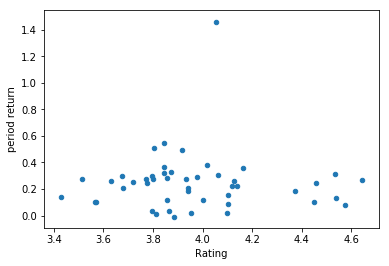

In [1429]:
OverviewPublic2.plot.scatter(x='Rating', y='period return')

- Notice that average individual ratings tend to be a little lower

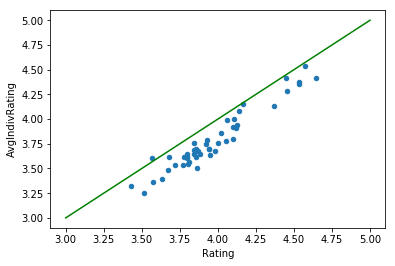

In [1478]:
x = [3,4,5]
y = x
m=1

plot1 = OverviewPublic2.plot.scatter(x='Rating', y='AvgIndivRating')
plt.plot(x, m*x + b, '-', color="green")

In [1699]:
X1 = OverviewPublic2[['AvgIndivRating']]
y1 = OverviewPublic2[['Rating']]
X1 = sm.add_constant(X1)
model11 = smf.OLS(y1, X1).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     572.8
Date:                Wed, 14 Feb 2018   Prob (F-statistic):           3.10e-27
Time:                        12:07:22   Log-Likelihood:                 54.170
No. Observations:                  47   AIC:                            -104.3
Df Residuals:                      45   BIC:                            -100.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5679      0.142      3.986      0.000       0.281       0.855
AvgIndivRating     0.8982      0.038     23.934      0.000       0.823       0.974
==============================================================================
Omnibus:                        4.432   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                3.252
Skew:                          -0.559   Prob(JB):                        0.197
Kurtosis:                       3.640   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1700]:
test1 = OverviewPublic2['Rating']-OverviewPublic2['AvgIndivRating']

In [1702]:
test1.describe()

count    47.000000
mean      0.182863
std       0.083317
min      -0.039074
25%       0.156822
50%       0.188788
75%       0.240969
max       0.360485
dtype: float64

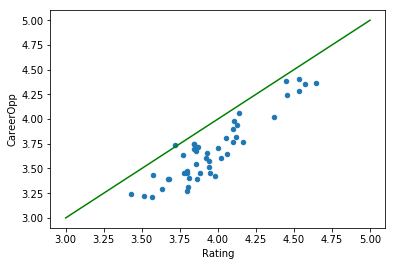

In [1479]:
plot1 = OverviewPublic2.plot.scatter(x='Rating', y='CareerOpp')
plt.plot(x, m*x + b, '-', color="green")

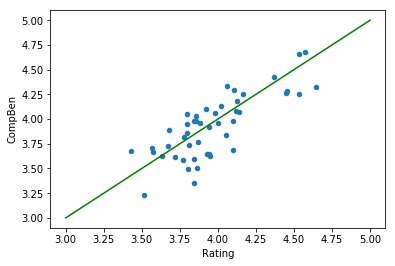

In [1481]:
plot1 = OverviewPublic2.plot.scatter(x='Rating', y='CompBen')
plt.plot(x, m*x + b, '-', color="green")

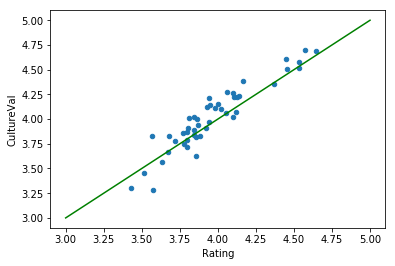

In [1483]:
plot1 = OverviewPublic2.plot.scatter(x='Rating', y='CultureVal')
plt.plot(x, m*x + b, '-', color="green")

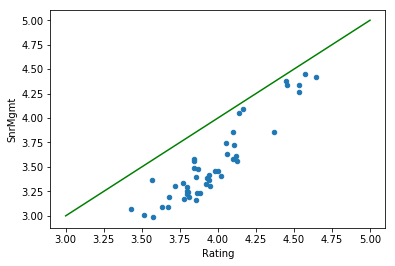

In [1484]:
plot1 = OverviewPublic2.plot.scatter(x='Rating', y='SnrMgmt')
plt.plot(x, m*x + b, '-', color="green")

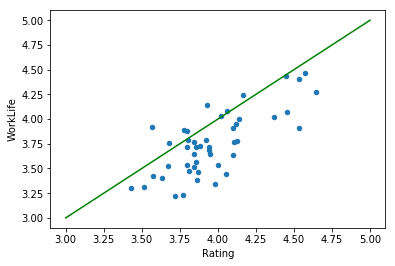

In [1485]:
plot1 = OverviewPublic2.plot.scatter(x='Rating', y='WorkLife')
plt.plot(x, m*x + b, '-', color="green")

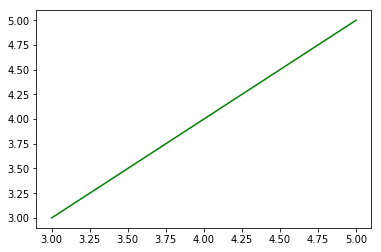

In [1475]:
x = [3,4,5]
y = x
m=1
plt.plot(x, m*x + b, '-', color="green")

In [1487]:
Formers = ReviewsNetReturns.groupby(['Ticker','FormerEmp'])
Formers.agg(['mean','count'])

CareerOpp         CompBen       CultureVal          Rating  \
                      mean count      mean count       mean count      mean   
Ticker FormerEmp                                                              
AAPL   0          3.540100  3616  4.134918  3617   4.228333  3600  4.077481   
       1          3.281250  3072  3.964460  3067   3.976752  3054  3.861938   
ACN    0          3.849202  1817  3.623220  1826   3.905702  1824  3.815900   
       1          3.532072   951  3.602524   951   3.543823   947  3.544390   
ADBE   0          3.740557  1006  4.162537  1009   4.256487  1002  4.149772   
       1          3.347390   498  4.080321   498   3.791165   498  3.762832   
ADDYY  0          3.429257   417  3.597590   415   4.012107   413  3.914163   
       1          3.162651   332  3.363363   333   3.772727   330  3.672634   
AVB    0          4.197917   192  3.890625   192   4.575916   191  4.437811   
       1          3.108108    74  3.152778    72   3.422535    71  3.259259   
CDW    0          3.898785   741  3.524324   740   4.259109   741  4.085000   
       1          3.069388   245  2.845528   246   3.296296   243  3.154122   
COF    0          3.533811  1952  3.962698  1957   4.041089  1947  3.876751   
       1          3.175000  1280  3.778988  1285   3.491752  1273  3.387925   
CRM    0          4.155504  1717  4.369616  1718   4.431659  1712  4.310458   
       1          3.427778   540  4.036900   542   3.577281   537  3.476112   
CSCO   0          3.543278  4344  3.818119  4349   3.899908  4326  3.881727   
       1          3.293062  2508  3.807310  2517   3.497804  2505  3.596621   
DAL    0          3.912519   663  4.037481   667   4.182779   662  4.264201   
       1          3.564334   443  3.898420   443   3.781609   435  3.857143   
DIS    0          3.417565   649  3.528682   645   3.984448   643  3.854690   
       1          3.377874   696  3.491453   702   4.012931   696  3.872881   
DRI    0          3.367403   362  3.323204   362   3.630252   357  3.674938   
       1          3.055215   326  3.133127   323   3.267913   321  3.336927   
EA     0          3.501259   397  3.806045   397   3.832487   394  3.909502   
       1          3.069519   374  3.424731   372   3.279570   372  3.330097   
ELLI   0          4.286957   115  4.215517   116   4.478261   115  4.415254   
       1          2.333333    15  2.933333    15   2.437500    16  2.235294   
FB     0          4.582766   441  4.718821   441   4.693878   441  4.711790   
       1          3.891156   147  4.469388   147   3.979730   148  4.006536   
...                    ...   ...       ...   ...        ...   ...       ...   
OSK    0          4.096154   104  4.076923   104   4.298077   104  4.227273   
       1          2.820513    39  3.717949    39   2.615385    39  3.000000   
PCTY   0          4.544218   441  4.395928   442   4.729120   443  4.631466   
       1          2.875000    48  3.061224    49   3.520833    48  2.849057   
PG     0          3.634601  1341  3.900000  1340   4.180120  1338  3.989508   
       1          3.802554  1018  4.046523  1021   4.104902  1020  4.021968   
RDSA   0          3.520742   916  3.950658   912   3.784378   909  3.864440   
       1          3.368622   784  3.946015   778   3.646452   775  3.716854   
RHHBY  0          3.598410   503  4.022088   498   3.953815   498  4.036900   
       1          3.247813   343  3.875723   346   3.652174   345  3.674300   
SAP    0          3.950000  2860  4.166725  2855   4.220028  2836  4.262164   
       1          3.474886  1095  3.869844  1091   3.687904  1083  3.753257   
SBUX   0          3.517336  5076  3.873336  5108   4.119636  5057  3.891976   
       1          3.276419  4826  3.593466  4836   3.904413  4781  3.726868   
SYK    0          4.003339   599  3.936348   597   4.255000   600  4.146305   
       1          3.207317   328  3.466463   328   3.375758   330  3.382749   
TMHC   0          4.437500   160  4.419753   162   4.716049   162  

In [1456]:
Recommends = ReviewsNetReturns.groupby(['Ticker','NoRecommend'])
Recommends.agg(['mean','count']).iloc[:,10:]


WorkLife       Public        Adj. Close        1D Prior  \
                        mean count   mean count        mean count      mean   
Ticker NoRecommend                                                            
AAPL   0            3.613670  5472   True  6184  113.339541  6184  0.000694   
       1            2.150741  1214   True  1243  113.040316  1243  0.000508   
ACN    0            3.440966  2236   True  2390   99.323046  2390  0.000868   
       1            2.296296   540   True   547   98.096357   547  0.000665   
ADBE   0            4.226575  1302   True  1452   98.534909  1452  0.001728   
       1            2.779412   204   True   208   92.276370   208  0.002529   
ADDYY  0            4.081803   599   True   703   68.731784   703  0.001669   
       1            2.626667   150   True   154   64.594266   154  0.002855   
AVB    0            4.191781   219   True   237  163.228877   237  0.000914   
       1            2.533333    45   True    45  157.909888    45  0.002412   
CDW    0            4.009988   801   True   885   39.117769   885  0.000408   
       1            2.704301   186   True   194   41.067394   194  0.002448   
COF    0            4.054205  2509   True  2825   76.451881  2825 -0.000259   
       1            2.743836   730   True   758   75.507135   758  0.000934   
CRM    0            4.022436  1872   True  2047   75.712686  2047  0.000274   
       1            2.484127   378   True   396   72.354861   396  0.001305   
CSCO   0            4.071831  5499   True  6327   27.144859  6327  0.000011   
       1            3.134460  1361   True  1401   26.446490  1401  0.000729   
DAL    0            3.827338   973   True  1124   43.100072  1124  0.001157   
       1            2.231343   134   True   137   39.609418   137 -0.000141   
DIS    0            3.646364  1100   True  1323   97.077418  1323  0.000220   
       1            2.200803   249   True   260   94.739821   260  0.000882   
DRI    0            3.679834   481   True   567   53.246660   567  0.000220   
       1            2.440594   202   True   207   51.130794   207  0.000351   
EA     0            3.702749   582   True   660   63.428120   660  0.003708   
       1            2.468421   190   True   194   59.643505   194  0.001701   
ELLI   0            4.457944   107   True   110   85.429182   110  0.001521   
       1            1.958333    24   True    25   84.069600    25 -0.000584   
FB     0            4.073665   543   True   564  113.123634   564  0.002203   
       1            1.956522    46   True    47  104.643194    47  0.005455   
...                      ...   ...    ...   ...         ...   ...       ...   
OSK    0            4.061947   113   True   129   64.790521   129  0.001728   
       1            2.066667    30   True    31   52.658074    31  0.001708   
PCTY   0            4.684807   441   True   464   38.475210   464  0.007110   
       1            2.240000    50   True    53   38.045094    53 -0.001372   
PG     0            3.682167  2086   True  2373   78.053246  2373  0.000025   
       1            2.384058   276   True   290   77.340608   290 -0.000853   
RDSA   0            3.963289  1362   True  1569   50.623558  1569  0.000218   
       1            2.682779   331   True   339   50.823573   339 -0.000299   
RHHBY  0            3.950213   703   True   788   31.022977   788 -0.000574   
       1            2.640845   142   True   147   31.169945   147  0.000890   
SAP    0            4.125688  3453   True  3847   88.181231  3847  0.000636   
       1            2.719192   495   True   505   80.934378   505  0.000588   
SBUX   0            3.734985  7992   True  9345   50.748096  9345  0.000453   
       1            2.407653  1960   True  2022   50.330897  2022  0.000363   
SYK    0            3.824658   730   True   828  108.499623   828  0.001180   
       1            2.160804   199   True   206  108.128866   206  0.000575   
TMHC   0            4.331288   163   True   168   22.153988   168 -0.0

In [1546]:
RatingsTable = ReviewsNetReturns[['Ticker','Rating','FormerEmp','NegOutlook','NoRecommend']].groupby('Ticker').mean()
RatingsTable.sort_values('Rating',ascending=False)

,Rating,FormerEmp,NegOutlook,NoRecommend
Ticker,,,,
HUBS,4.643590,0.153846,0.015385,0.053846
ULTI,4.573269,0.120773,0.035427,0.070853
GWRE,4.536325,0.087607,0.027778,0.081197
FB,4.535188,0.250409,0.022913,0.076923
TMHC,4.457447,0.127660,0.047872,0.106383
PCTY,4.448743,0.102515,0.038685,0.102515
GOOG,4.372099,0.432595,0.027901,0.071186
Z,4.164062,0.289062,0.101562,0.171875
ELLI,4.140741,0.125926,0.029630,0.185185


In [1678]:
OverviewPublicCombine[['Name','Industry','Rating']].sort_values('Rating',ascending=False).iloc[:24,:]

,Name,Industry,Rating
Ticker,,,
HUBS,HubSpot,Computer Hardware & Software,4.643590
ULTI,Ultimate Software,Enterprise Software & Network Solutions,4.573269
GWRE,Guidewire,Computer Hardware & Software,4.536325
FB,Facebook,Internet,4.535188
TMHC,Taylor Morrison,Construction,4.457447
PCTY,Paylocity,Staffing & Outsourcing,4.448743
GOOG,Google,Internet,4.372099
Z,Zillow,Real Estate,4.164062
ELLI,Ellie Mae,Computer Hardware & Software,4.140741


In [1462]:
NegOutlookers = ReviewsNetReturns.groupby(['Ticker','NegOutlook'])

In [1489]:
ReviewsNetReturns.columns

Index(['Advice', 'AuthLoc', 'AuthTitle', 'CareerOpp', 'CompBen', 'Cons',
       'CultureVal', 'DateRev', 'EmpType', 'Name', 'OpCEO', 'Outlook', 'Pros',
       'Rating', 'Recommend', 'SnrMgmt', 'UserSumm', 'WorkLife', 'CompanyHQ',
       'Industry', 'Revenue', 'Size', 'Type', 'Public', 'Ticker', 'index',
       'Adj. Close', '1D Prior', '4W Prior', '12W Prior', '1D Future',
       '4W Future', '12W Future', 'Date', 'SPY Adj. Close', 'SPY 1D Prior',
       'SPY 4W Prior', 'SPY 12W Prior', 'SPY 1D Future', 'SPY 4W Future',
       'SPY 12W Future', '1D Net Pre', '4W Net Pre', '12W Net Pre',
       '1D Net Post', '4W Net Post', '12W Net Post', 'FormerEmp', 'NegOutlook',
       'NoRecommend'],
      dtype='object')

In [1490]:
PlotNegData = ReviewsNetReturns[['Rating','FormerEmp','NegOutlook','NoRecommend']]

In [1495]:
X1 = ReviewsNetReturns[['FormerEmp','NegOutlook','NoRecommend']]
y1 = ReviewsNetReturns[['Rating']]
X1 = sm.add_constant(X1)
model11 = smf.OLS(y1, X1).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                 2.328e+04
Date:                Wed, 14 Feb 2018   Prob (F-statistic):               0.00
Time:                        00:25:52   Log-Likelihood:            -1.1251e+05
No. Observations:               93111   AIC:                         2.250e+05
Df Residuals:                   93107   BIC:                         2.251e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.3023      0.004   1205.219      0.000       4.295       4.309
FormerEmp      -0.2052      0.005    -37.649      0.000      -0.216      -0.195
NegOutlook     -0.5672      0.011    -52.262      0.000      -0.588      -0.546
NoRecommend    -1.6180      0.008   -201.242      0.000      -1.634      -1.602
==============================================================================
Omnibus:                     5656.798   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6965.104
Skew:                          -0.605   Prob(JB):                         0.00
Kurtosis:                       3.577   Cond. No.                         4.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1508]:
FinalReviwsSet = ReviewsNetReturns[['Ticker','Rating','DateRev','FormerEmp','NegOutlook', 'NoRecommend','12W Net Pre', '4W Net Pre', '1D Net Pre',
       '1D Net Post', '4W Net Post', '12W Net Post']]

In [1516]:
TestSummary = FinalReviwsSet.groupby(['FormerEmp','NegOutlook','NoRecommend']).agg('mean')
TestSummary['12W Net Pre'] = TestSummary['12W Net Pre']*100
TestSummary['4W Net Pre'] = TestSummary['4W Net Pre']*100
TestSummary['1D Net Pre'] = TestSummary['1D Net Pre']*100
TestSummary['1D Net Post'] = TestSummary['1D Net Post']*100
TestSummary['4W Net Post'] = TestSummary['4W Net Post']*100
TestSummary['12W Net Post'] = TestSummary['12W Net Post']*100


In [1517]:
TestSummary

Rating  12W Net Pre  4W Net Pre  \
FormerEmp NegOutlook NoRecommend                                      
0         0          0            4.311159     1.832772    0.586715   
                     1            2.631405     1.572561    0.563277   
          1          0            3.531602    -0.082771   -0.076820   
                     1            2.138372     0.924173    0.322279   
1         0          0            4.091072     1.475803    0.507558   
                     1            2.477162     1.722279    0.544137   
          1          0            3.514872     0.348996    0.408792   
                     1            1.980316     1.055770    0.324410   

                                  1D Net Pre  1D Net Post  4W Net Post  \
FormerEmp NegOutlook NoRecommend                                         
0         0          0              0.034497     0.024993     0.267028   
                     1              0.007070     0.028930     0.389079   
          1          0             -0.009228     0.011242     0.320679   
                     1              0.026074     0.008111     0.183324   
1         0          0              0.024559     0.015462     0.226288   
                     1              0.021248    -0.010339     0.145415   
          1          0             -0.011220    -0.024648     0.413950   
                     1              0.029502     0.012950     0.490247   

                                  12W Net Post  
FormerEmp NegOutlook NoRecommend                
0         0          0                0.772536  
                     1                0.681389  
          1          0                0.781410  
                     1                0.914715  
1         0          0                0.744058  
                     1                0.626283  
          1          0                0.926614  
                     1                0.894991

In [1518]:
TestSummary2 = FinalReviwsSet.groupby(['Rating']).agg('mean')
TestSummary2['12W Net Pre'] = TestSummary2['12W Net Pre']*100
TestSummary2['4W Net Pre'] = TestSummary2['4W Net Pre']*100
TestSummary2['1D Net Pre'] = TestSummary2['1D Net Pre']*100
TestSummary2['1D Net Post'] = TestSummary2['1D Net Post']*100
TestSummary2['4W Net Post'] = TestSummary2['4W Net Post']*100
TestSummary2['12W Net Post'] = TestSummary2['12W Net Post']*100

In [1519]:
TestSummary2

,FormerEmp,NegOutlook,NoRecommend,12W Net Pre,4W Net Pre,1D Net Pre,1D Net Post,4W Net Post,12W Net Post
Rating,,,,,,,,,
1.0,0.592671,0.505045,0.874403,1.574520,0.466502,-0.004444,0.022816,0.127356,0.512405
2.0,0.543380,0.321027,0.784863,1.472078,0.522728,0.041566,0.012452,0.321793,0.968873
3.0,0.477450,0.130553,0.333390,1.336998,0.378396,0.011298,0.001697,0.256693,0.716031
4.0,0.413081,0.034486,0.035205,1.417915,0.483310,0.023463,0.025121,0.207398,0.694396
5.0,0.304864,0.008633,0.007767,2.003924,0.679772,0.043007,0.022120,0.321227,0.844187


- This gives some initial possibility that the poor reviews could indicate upcoming poor performance, with a lot of caveats. Firstly, this data is still quite small, we are only looking at 47 companies. 
- Highly sensitive to the possibility of a handful of the larger companies distorting the data. 

In [1521]:
FinalReviwsSet.groupby('Ticker').agg('mean')

,Rating,FormerEmp,NegOutlook,NoRecommend,12W Net Pre,4W Net Pre,1D Net Pre,1D Net Post,4W Net Post,12W Net Post
Ticker,,,,,,,,,,
AAPL,3.978053,0.461290,0.067053,0.167362,0.021384,0.005323,0.000341,-0.000062,0.003337,0.010864
ACN,3.721144,0.348996,0.064692,0.186244,0.016600,0.005195,0.000319,0.000068,0.005064,0.012551
ADBE,4.018072,0.340361,0.043373,0.125301,0.045848,0.016679,0.000930,0.000620,0.014877,0.038967
ADDYY,3.803967,0.456243,0.092182,0.179697,0.053121,0.016025,0.001251,0.000015,0.007466,0.030658
AVB,4.099291,0.287234,0.049645,0.159574,0.005236,0.004032,0.000914,0.001030,-0.006622,-0.012030
CDW,3.844300,0.258573,0.071362,0.179796,0.041716,0.008852,0.000269,0.000468,0.006733,0.030298
COF,3.680156,0.402177,0.116104,0.211555,0.001592,0.000097,-0.000337,0.000298,-0.001575,-0.008618
CRM,4.103152,0.248465,0.043799,0.162096,0.019443,0.006331,0.000342,0.000274,0.002719,0.008826
CSCO,3.776915,0.367624,0.112836,0.181289,0.007712,0.002511,-0.000211,-0.000024,0.001679,0.005417


In [ ]:
testrolling = ReviewsCleanReturns2[ReviewsCleanReturns2.Ticker=="AAPL"].sort_values(['DateRev'])

In [958]:
testrolling['6mroll'] = testrolling['Rating'].rolling(window=120).mean()

In [960]:
testrolling.sort_values(['DateRev'])[100:200]

,Advice,AuthLoc,AuthTitle,CareerOpp,CompBen,Cons,CultureVal,DateRev,EmpType,Name,...,12W Future,Date,SPY Adj. Close,SPY 1D Prior,SPY 4W Prior,SPY 12W Prior,SPY 1D Future,SPY 4W Future,SPY 12W Future,6mroll
70611,None. They would rather make money than listen...,NaN,Former Employee - Anonymous Employee,NaN,NaN,"Took drastic pay cut, training was terrible, s...",NaN,2013-04-01,Former,Apple,...,-0.058205,2013-04-01,141.789734,-0.003957,0.030466,NaN,0.004910,0.020402,0.021072,NaN
70614,keep being the best managers you can be and ge...,"Temecula, CA",Current Employee - Red Zone Specialist,5.0,5.0,compétitive environment inconsistent schedule ...,5.0,2013-04-01,Current,Apple,...,-0.058205,2013-04-01,141.789734,-0.003957,0.030466,NaN,0.004910,0.020402,0.021072,NaN
70612,certain role transitions do not adjust to a hi...,NaN,Former Employee - Anonymous Employee,5.0,3.0,Pay is not where it could be based on experience.,5.0,2013-04-01,Former,Apple,...,-0.058205,2013-04-01,141.789734,-0.003957,0.030466,NaN,0.004910,0.020402,0.021072,NaN
16744,"Be yourselves, dont loose what make Apple Stor...","Houston, TX",Former Employee - Family Room Specialist,3.0,4.0,Middle management is so concerned about the st...,4.0,2013-04-02,Former,Apple,...,-0.072528,2013-04-02,142.489349,0.004934,0.030065,NaN,-0.010243,0.017911,0.025886,NaN
17037,Get to know the people you work with. Respect ...,"Los Angeles, CA",Former Employee - Mac Specialist (Apple Store),3.0,1.0,"At first, management was welcoming, made every...",2.0,2013-04-03,Former,Apple,...,-0.089757,2013-04-03,141.044647,-0.010139,0.010567,NaN,0.004042,0.019270,0.041390,NaN
17038,NaN,"Cupertino, CA",Current Employee - Senior Director,3.0,5.0,- No life balance - Lots of internal politics ...,3.0,2013-04-03,Current,Apple,...,-0.089757,2013-04-03,141.044647,-0.010139,0.010567,NaN,0.004042,0.019270,0.041390,NaN
16772,NaN,NaN,Former Employee - Anonymous Employee,1.0,5.0,"None loved working here, contract position tha...",5.0,2013-04-04,Former,Apple,...,-0.071503,2013-04-04,141.617096,0.004059,0.013290,NaN,-0.004512,0.024350,0.033539,NaN
70480,Apple in London have almost no options for per...,"London, England (UK)",Former Employee - Demand Forecasting,3.0,5.0,Progression within Apple is almost impossible....,3.0,2013-04-05,Former,Apple,...,-0.027303,2013-04-05,140.981049,-0.004491,0.006914,NaN,0.006722,0.038483,0.043485,NaN
70481,Get new store management. Promote from within....,"San Francisco, CA",Current Employee - Mac Specialist (Apple Store),1.0,3.0,"Terrible management. Our ""market"" needs attent...",1.0,2013-04-05,Current,Apple,...,-0.027303,2013-04-05,140.981049,-0.004491,0.006914,NaN,0.006722,0.038483,0.043485,NaN
70482,Give some additional support and training to t...,"Chicago, IL",Current Employee - Store Manager,3.0,3.0,"Long hours, managers never get to take the 15 ...",3.0,2013-04-05,Current,Apple,...,-0.027303,2013-04-05,140.981049,-0.004491,0.006914,NaN,0.006722,0.038483,0.043485,NaN


In [1556]:
Airlines = ReviewsNetReturns[(ReviewsNetReturns.Ticker=='DAL') | (ReviewsNetReturns.Ticker=='UAL') | (ReviewsNetReturns.Ticker=='LUV')]

In [1559]:
Airlines.groupby('Ticker').agg('mean')

,CareerOpp,CompBen,CultureVal,Rating,SnrMgmt,WorkLife,Public,Adj. Close,1D Prior,4W Prior,...,SPY 12W Future,1D Net Pre,4W Net Pre,12W Net Pre,1D Net Post,4W Net Post,12W Net Post,FormerEmp,NegOutlook,NoRecommend
Ticker,,,,,,,,,,,,,,,,,,,,,
DAL,3.773056,3.981982,4.023701,4.101507,3.577982,3.634146,True,42.720834,0.001016,0.021075,...,0.028434,0.000709,0.010396,0.021582,0.000495,0.004888,0.010206,0.399683,0.046788,0.108644
LUV,3.935526,4.178010,4.226316,4.127251,3.559413,3.782552,True,41.843025,0.000758,0.025806,...,0.031898,0.000281,0.015165,0.044931,0.000353,0.011669,0.031663,0.385354,0.051621,0.134454
UAL,3.434434,3.664591,3.284685,3.570635,2.989121,3.423729,True,57.140103,0.001812,0.016972,...,0.031055,0.000773,0.006659,0.003697,-0.000714,-0.004492,-0.014314,0.365079,0.139683,0.259524


In [1563]:
Airlines['Airline'] = Airlines.Ticker.astype('category')

/Users/billy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1598]:
Airlines['randuni']# = np.random.uniform(-1,1,len(Airlines))*.3
Airlines['jitter rating']

47       1.912306
48       2.878915
49       4.049029
50       4.291613
77       4.982247
147      4.078731
148      1.776668
149      4.285189
150      4.220383
151      4.934670
176      2.914071
239      5.273739
320      4.228581
321      1.753867
344      3.914668
358      3.858806
359      4.260015
460      3.232511
469      3.267154
500      2.262860
518      3.113064
527      5.241233
581      3.109357
582      2.065494
637      3.271707
679      3.803930
700      4.912516
701      3.156238
770      4.960354
783      4.834540
           ...   
92133    4.148184
92134    4.700244
92194    4.835139
92213    3.957556
92214    3.247975
92314    5.069562
92315    3.185903
92316    5.260448
92471    3.028094
92472    4.210687
92473    4.859325
92474    4.789074
92475    3.936448
92621    4.051669
92622    4.901858
92666    3.712948
92695    4.969988
92696    3.103247
92779    5.057468
92780    5.061112
92838    3.074739
92888    5.087978
92935    3.174388
92975    1.970348
92986    4

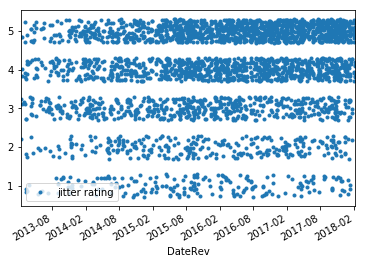

In [1599]:
Airlines.plot(x='DateRev', y='jitter rating', style=".")

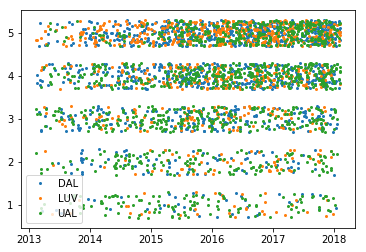

In [1703]:
groups = Airlines.groupby('Airline')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.DateRev, group['jitter rating'], marker='.', linestyle='', ms=4, label=name)
ax.legend()

plt.show()

In [1615]:
AirlinesReviewsFinal = Airlines[['Ticker','Airline','Rating','DateRev','FormerEmp','NegOutlook', 'NoRecommend','12W Net Pre', '4W Net Pre', '1D Net Pre',
       '1D Net Post', '4W Net Post', '12W Net Post']]

TestSummaryAirlines = AirlinesReviewsFinal.groupby(['NegOutlook','Airline'])
TestSummaryAirlines = TestSummaryAirlines.agg('mean')
TestSummaryAirlines['12W Net Pre'] = TestSummaryAirlines['12W Net Pre']*100
TestSummaryAirlines['4W Net Pre'] = TestSummaryAirlines['4W Net Pre']*100
TestSummaryAirlines['1D Net Pre'] = TestSummaryAirlines['1D Net Pre']*100
TestSummaryAirlines['1D Net Post'] = TestSummaryAirlines['1D Net Post']*100
TestSummaryAirlines['4W Net Post'] = TestSummaryAirlines['4W Net Post']*100
TestSummaryAirlines['12W Net Post'] = TestSummaryAirlines['12W Net Post']*100

In [1621]:
TestSummaryAirlines['number']=[1202,790,1084,59,43,176]

In [1619]:
TestSummaryAirlinesnum = AirlinesReviewsFinal.groupby(['NegOutlook','Airline'])
TestSummaryAirlinesnum = TestSummaryAirlinesnum.agg('count')

In [1623]:
TestSummaryAirlines


Rating  FormerEmp  NoRecommend  12W Net Pre  4W Net Pre  \
NegOutlook Airline                                                              
0          DAL      4.190516   0.394343     0.074875     2.253741    1.132944   
           LUV      4.227848   0.373418     0.101266     4.447655    1.533251   
           UAL      3.826568   0.339483     0.154982     0.339094    0.457715   
1          DAL      2.288136   0.508475     0.796610     0.208579   -0.885922   
           LUV      2.279070   0.604651     0.744186     5.334711    1.210062   
           UAL      1.994318   0.522727     0.903409     0.559111    1.943444   

                    1D Net Pre  1D Net Post  4W Net Post  12W Net Post  number  
NegOutlook Airline                                                              
0          DAL        0.089101     0.051577     0.543324      1.164190    1202  
           LUV        0.017401     0.028728     1.131205      3.130028     790  
           UAL        0.076133    -0.076539    -0.445555     -1.754749    1084  
1          DAL       -0.299514     0.006929    -0.625486     -1.838906      59  
           LUV        0.224538     0.155295     1.814669      3.834341      43  
           UAL        0.084608    -0.039706    -0.470997      0.561722     176

In [1624]:
ReviewsNetReturns[ReviewsNetReturns['Advice','Cons','']]

,Advice,AuthLoc,AuthTitle,CareerOpp,CompBen,Cons,CultureVal,DateRev,EmpType,Name,...,SPY 12W Future,1D Net Pre,4W Net Pre,12W Net Pre,1D Net Post,4W Net Post,12W Net Post,FormerEmp,NegOutlook,NoRecommend
0,NaN,Paris (France),Current Employee - Anonymous Employee,5.0,5.0,"Malgré la volonté innovante de l'entreprise, c...",5.0,2017-11-13,Current,Walt Disney Company,...,0.017146,-0.001312,0.063672,-0.036496,-0.012890,-0.006635,NaN,0,0,0
1,.Train the managers better,"Hollywood, CA",Former Employee - Sales Associate,1.0,1.0,The pay is not as much as I was promised. Did ...,5.0,2017-11-13,Former,Walt Disney Company,...,0.017146,-0.001312,0.063672,-0.036496,-0.012890,-0.006635,NaN,1,1,0
2,Keep it up,Petaling Jaya (Malaysia),Former Employee - Student,NaN,NaN,Medical benefits Good salary for part time Fri...,NaN,2017-11-13,Former,Starbucks,...,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN,1,0,0
3,NaN,NaN,Former Employee - Anonymous Employee,4.0,NaN,Every single thing about it,NaN,2017-11-13,Former,Starbucks,...,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN,1,0,0
4,NaN,"Seattle, WA",Former Employee - Store Manager,3.0,4.0,hard to move past store manager,4.0,2017-11-13,Former,Starbucks,...,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN,1,0,0
5,NaN,"Springfield, VA",Current Employee - Barista - Starbucks,4.0,4.0,"Rude guests and short ""breaks""",3.0,2017-11-13,Current,Starbucks,...,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN,0,0,0
6,NaN,NaN,Current Employee - Anonymous Employee,NaN,NaN,Career growth is difficult here,NaN,2017-11-13,Current,Starbucks,...,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN,0,0,0
7,More staff will enable better customer service.,NaN,Current Employee - Anonymous Employee,3.0,4.0,"Low tips/base pay, can be repetitive work, way...",5.0,2017-11-13,Current,Starbucks,...,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN,0,1,0
8,NaN,NaN,Former Employee - Anonymous Employee,NaN,NaN,fast paced and small learning time,NaN,2017-11-13,Former,Starbucks,...,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN,1,0,0
9,NaN,"Chicago, IL",Former Employee - Barista,5.0,5.0,"Customer servise, harsh hours, unpredictable w...",5.0,2017-11-13,Former,Starbucks,...,0.017146,-0.007942,0.004603,-0.001765,0.007422,0.017729,NaN,1,0,0


In [1659]:
teststrings = ReviewsNetReturns.Cons.astype(str)
teststrings2 = pd.DataFrame(list(map(lambda s: s.find('fraud'),teststrings)))
fraudstrings = ReviewsNetReturns[teststrings2.iloc[:,0]>-1]

In [1668]:
fraudstrings.iloc[3,5]

'shady shady shady business practices in big market. CEO send out email to stop calling customers about upgrades, district manager calls next day and tells us to keep doing it. deactivating phone lines and reactivating under spouses name and social. lots of commissions fraud.'

In [1669]:
fraudstrings

,Advice,AuthLoc,AuthTitle,CareerOpp,CompBen,Cons,CultureVal,DateRev,EmpType,Name,...,SPY 12W Future,1D Net Pre,4W Net Pre,12W Net Pre,1D Net Post,4W Net Post,12W Net Post,FormerEmp,NegOutlook,NoRecommend
11153,NaN,"Fort McMurray, AB (Canada)",Current Employee - Project Engineer,4.0,5.0,not very professional people working with you ...,3.0,2016-11-04,Current,Shell,...,0.089749,-0.010885,0.010297,0.047981,-0.000553,-0.001924,0.005729,0,0,0
16131,Fire everyone and start over.,NaN,Former Employee - Anonymous Employee,1.0,3.0,-Power hungry female managers -Call volume ins...,1.0,2018-02-06,Former,Capital One,...,NaN,-0.004857,-0.005926,0.048341,0.002193,NaN,NaN,1,1,1
20906,Do better.,"Miami, FL",Former Employee - Sales Specialist,4.0,3.0,Managers behaving like children. A senior mana...,5.0,2014-05-27,Former,Apple,...,0.041791,0.012579,0.034153,0.162910,-0.001865,-0.011006,0.073917,1,0,0
23791,stop demanding so much of your RSM's; you are ...,"Dallas, TX",Former Employee - Retail Sales Associate,3.0,3.0,shady shady shady business practices in big ma...,4.0,2014-10-13,Former,T-Mobile,...,0.094797,-0.008564,-0.060148,-0.116829,-0.020856,-0.015956,-0.022433,1,1,0
31883,"I wrote the BOD too, as I am a stockholder. I ...","London, England (UK)",Former Employee - Flight Attendant,3.0,3.0,I was fired 1 month before full retirement. I ...,2.0,2015-07-29,Former,United Airlines,...,-0.021781,-0.027687,0.055528,-0.063150,-0.006747,0.022222,0.001085,1,1,1
37547,Resign. All of you. You're a waste of space.,"San Diego, CA",Former Employee - Security Drone,2.0,5.0,Company is crawling with mid-level and senior ...,2.0,2015-11-03,Former,Intuit,...,-0.083151,-0.000848,0.012744,-0.073236,0.014480,0.029835,0.072456,1,1,1
52477,Reconsider rehire policy based on the manager ...,"Plano, TX",Former Employee - Loss Mitigation,5.0,5.0,Jealous spiteful management that drummed up fa...,5.0,2016-10-27,Former,Capital One,...,0.076879,-0.005685,0.070138,0.139700,0.000686,0.082444,0.081190,1,0,0
53158,Allow your team to see and hear you take a few...,NaN,Former Employee - Anonymous Employee,3.0,3.0,You have to talk or chat all day to different ...,5.0,2016-12-06,Former,Apple,...,0.072816,0.004531,-0.044279,0.018232,-0.003185,0.030616,0.141489,1,0,0
57371,NaN,NaN,Current Employee - Anonymous Employee,NaN,NaN,Nope fraud from my side as we need to find it’...,NaN,2017-03-22,Current,Salesforce,...,0.039140,0.001693,0.001714,0.127377,-0.003348,0.021314,0.008767,0,0,0
57544,"Listen to your agents, don't just assume that ...","Tampa, FL",Former Employee - Fraud Representative,4.0,5.0,I worked in fraud for a while before everythin...,3.0,2017-03-15,Former,Capital One,...,0.022575,-0.028599,-0.025348,-0.060108,0.005186,-0.074397,-0.140016,1,1,0


In [1673]:
ReviewsNetReturns.UserSumm

0        I have been working at Walt Disney Company ful...
1        I worked at Walt Disney Company full-time (Mor...
2                 I worked at Starbucks (More than a year)
3                          I worked at Starbucks part-time
4                I worked at Starbucks (More than 3 years)
5        I have been working at Starbucks part-time (Mo...
6                                                      NaN
7        I have been working at Starbucks (More than 5 ...
8                          I worked at Starbucks part-time
9        I worked at Starbucks full-time (More than a y...
10                                                     NaN
11       I worked at Starbucks full-time (More than 5 y...
12         I have been working at Shell (More than a year)
13       I have been working at adidas full-time (More ...
14       I worked at Cisco Systems full-time (More than...
15       I worked at Cisco Systems full-time (More than...
16       I have been working at Cisco Systems full-time.